In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from nltk.metrics.distance import edit_distance

from jiwer import process_words

In [44]:
# Load evaluation data
evaluation_data = pd.read_csv('results.csv')
evaluation_data = evaluation_data[evaluation_data['TestType'] == 'intelligibility']

transcription_dict = evaluation_data.set_index('AudioID')['Response'].to_dict()

# Load reference text
with open('../datasets/test_sentences.txt', 'r') as f:
    reference_texts = f.readlines()

reference_dict = {}
for line in reference_texts:
    audio_id, reference_text = line.strip().split('|', 1)
    reference_dict[audio_id] = reference_text

In [50]:
wer_values = []

for index, row in evaluation_data.iterrows():
  audio_id = row['AudioID']
    
  ref = reference_dict[audio_id]
  hyp = row['Response']
    
  out = process_words(ref, hyp)  # Assuming process_words is your WER calculation function
  wer = out.wer
    
  wer_values.append(wer)


evaluation_data['WER'] = wer_values

In [51]:
# Group by ModelID to calculate average WER
model_wer = evaluation_data.groupby('ModelID')['WER'].mean().reset_index()

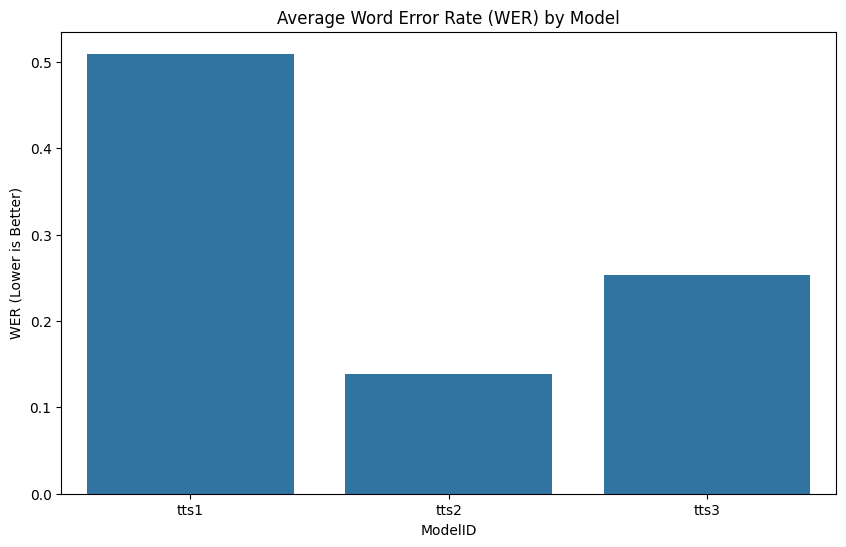

In [52]:
# Plot 1: Bar plot for average WER by model
plt.figure(figsize=(10, 6))
sns.barplot(x='ModelID', y='WER', data=model_wer)
plt.title('Average Word Error Rate (WER) by Model')
plt.ylabel('WER (Lower is Better)')
plt.show()

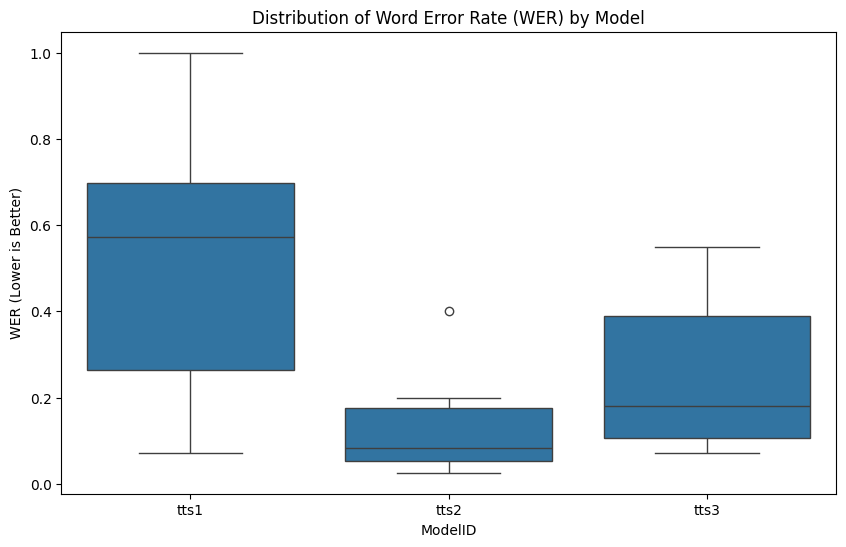

In [53]:
# Plot 2: Box plot for WER distribution by model
plt.figure(figsize=(10, 6))
sns.boxplot(x='ModelID', y='WER', data=evaluation_data)
plt.title('Distribution of Word Error Rate (WER) by Model')
plt.ylabel('WER (Lower is Better)')
plt.show()